**PROJET 7** : Implémentez un modèle de scoring

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

## Checking versions

In [2]:
#Check  versions
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib as mpl #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(mpl.__version__))

import numpy as np #foundational package for scientific computing
print("numPy version: {}". format(np.__version__))

import seaborn as sns #graphs
print("seaborn version: {}". format(sns.__version__))


import missingno as msgno #plotting missing values
print("missingno version: {}". format(msgno.__version__))


import pca #principal component analysis
print("pca version: {} ". format(pca.__version__))



import matplotlib.pyplot as plt

sns.set()

Python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.3.5
matplotlib version: 3.4.2
numPy version: 1.21.4
seaborn version: 0.11.1
missingno version: 0.5.0
pca version: 1.5.2 


## Data schema

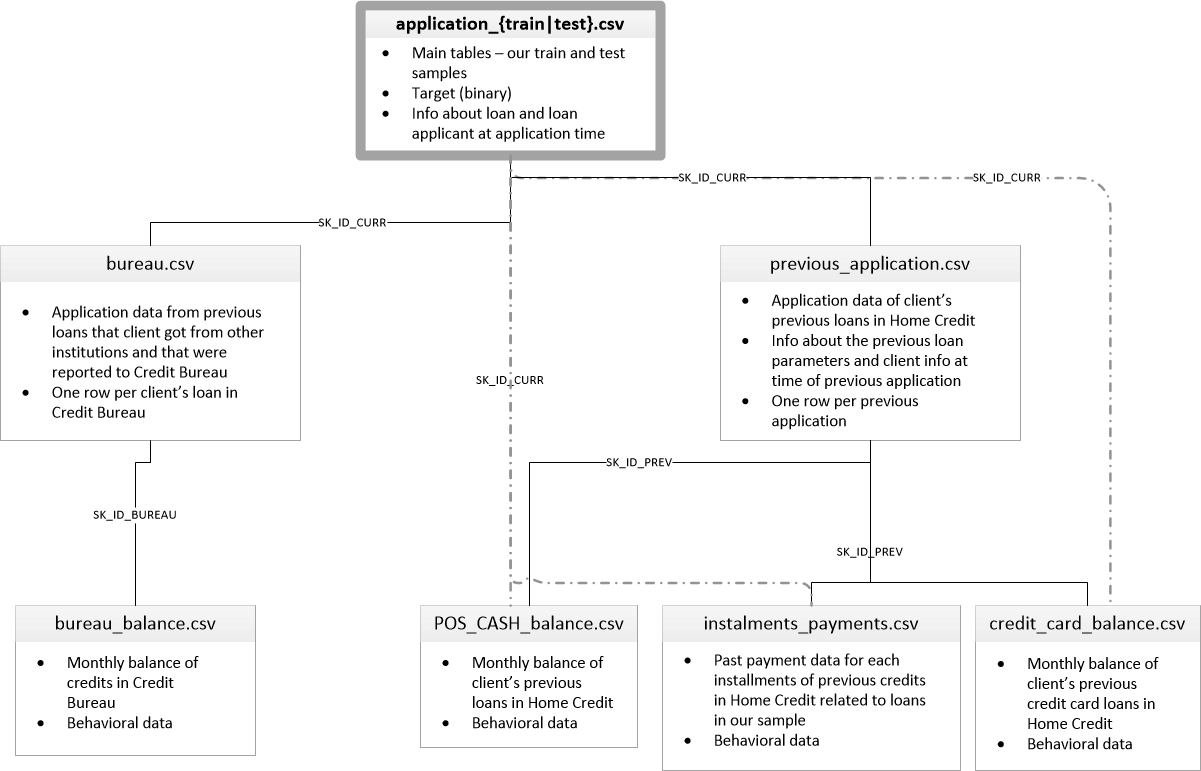

# **Importing pre traited data**


## Loading libraries

In [3]:
# import 'data stack' libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# increase the maximum number of columns to display
pd.set_option("display.max_columns", 1000)  # Maximum number of columns
pd.set_option("display.max_rows", 1000)  # Maximum number of columns

## Loading data

In [4]:
train = pd.read_csv('data_p7/raw/m_train_small.csv')
test = pd.read_csv('data_p7/raw/m_test_small.csv')

print('Training set full shape: ', train.shape)
print('Testing set full shape: ' , test.shape)

Training set full shape:  (307511, 115)
Testing set full shape:  (48744, 114)


In [5]:
train.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,bureau_DAYS_CREDIT_ENDDATE_max,DAYS_EMPLOYED,DAYS_ID_PUBLISH,bureau_DAYS_CREDIT_max,bureau_AMT_CREDIT_SUM_mean,OWN_CAR_AGE,bureau_AMT_CREDIT_MAX_OVERDUE_mean,DAYS_LAST_PHONE_CHANGE,bureau_DAYS_ENDDATE_FACT_max,DAYS_REGISTRATION,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_min,APARTMENTS_AVG,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_UPDATE_max,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,CODE_GENDER_F,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_sum,bureau_DAYS_CREDIT_ENDDATE_mean,YEARS_BEGINEXPLUATATION_AVG,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_CREDIT_ENDDATE_min,LANDAREA_AVG,NAME_EDUCATION_TYPE_Highereducation,BASEMENTAREA_AVG,NAME_CONTRACT_TYPE_Cashloans,bureau_DAYS_CREDIT_UPDATE_mean,COMMONAREA_AVG,bureau_AMT_CREDIT_SUM_LIMIT_max,client_bureau_balance_STATUS_C_count_norm_max,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,client_bureau_balance_STATUS_0_count_norm_mean,bureau_CREDIT_ACTIVE_Active_count,REGION_RATING_CLIENT,NAME_FAMILY_STATUS_Married,bureau_CREDIT_ACTIVE_Closed_count_norm,NONLIVINGAREA_AVG,DEF_30_CNT_SOCIAL_CIRCLE,YEARS_BUILD_AVG,ENTRANCES_AVG,client_bureau_balance_STATUS_0_count_mean,bureau_CREDIT_TYPE_Mortgage_count_norm,FLAG_DOCUMENT_3,bureau_CREDIT_TYPE_Consumercredit_count_norm,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_ANNUITY_mean,FLOORSMIN_AVG,bureau_CREDIT_TYPE_Microloan_count_norm,client_bureau_balance_STATUS_C_count_mean,FLOORSMAX_AVG,client_bureau_balance_STATUS_1_count_norm_max,client_bureau_balance_STATUS_1_count_norm_mean,client_bureau_balance_MONTHS_BALANCE_count_mean,bureau_CREDIT_TYPE_Creditcard_count_norm,client_bureau_balance_STATUS_0_count_max,client_bureau_balance_STATUS_X_count_mean,bureau_CREDIT_TYPE_Creditcard_count,AMT_REQ_CREDIT_BUREAU_QRT,bureau_CREDIT_TYPE_Carloan_count_norm,bureau_AMT_ANNUITY_min,bureau_AMT_CREDIT_MAX_OVERDUE_count,client_bureau_balance_MONTHS_BALANCE_max_mean,client_bureau_balance_STATUS_0_count_norm_min,bureau_AMT_ANNUITY_max,NONLIVINGAPARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,client_bureau_balance_MONTHS_BALANCE_count_min,NAME_INCOME_TYPE_Working,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Closed_count,client_bureau_balance_STATUS_X_count_norm_max,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE_Selfemployed,NAME_EDUCATION_TYPE_Secondarysecondaryspecial,client_bureau_balance_STATUS_X_count_norm_mean,FLAG_DOCUMENT_18,client_bureau_balance_MONTHS_BALANCE_mean_sum,FLAG_WORK_PHONE,OCCUPATION_TYPE_Corestaff,client_bureau_balance_STATUS_0_count_norm_max,bureau_AMT_CREDIT_SUM_LIMIT_min,client_bureau_balance_STATUS_X_count_max,NAME_INCOME_TYPE_Stateservant,FLAG_DOCUMENT_13,ORGANIZATION_TYPE_Construction,bureau_CREDIT_TYPE_Microloan_count,OCCUPATION_TYPE_Drivers,ORGANIZATION_TYPE_Military,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_AMT_CREDIT_SUM_OVERDUE_max,OCCUPATION_TYPE_Laborers,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_16,ORGANIZATION_TYPE_Industrytype9,client_bureau_balance_STATUS_1_count_mean,ORGANIZATION_TYPE_BusinessEntityType3,bureau_AMT_CREDIT_SUM_OVERDUE_mean,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Transporttype3,CODE_GENDER_M,OCCUPATION_TYPE_Highskilltechstaff,client_bureau_balance_STATUS_X_count_min,TARGET,SK_ID_CURR
0,0.083037,0.262949,0.139376,-9461,406597.5,24700.5,780.0,-637,-2120,-103.0,108131.945625,NaN,1681.029,-1134.0,-36.0,-3648.0,49156.2,0.0,0.0247,-874.00,-7.0,0.018801,202500.0,0,245781.0,-1185.0,-6992.0,-349.0,0.9722,7997.14125,-697.500000,-1072.0,0.0369,0,0.0369,1,-499.875,0.0143,31988.565,0.8125,1.0,10,0.40696,2.0,2,0,0.75,0.0000,2.0,0.6192,0.0690,5.625,0.0,1,0.5,0.0,0.0,0.1250,0.0,2.875,0.0833,0.5,0.255682,13.75,0.5,18.0,1.875,4.0,0.0,0.0,0.0,5.0,-15.5,0.1875,0.0,0.0000,2.0,4.0,1,0.25,6.0,0.5,0,0,1,0.161932,0,-175.0,0,0,0.818182,0.0,3.0,0,0,0,0.0,0,0,0.0,0.0,1,0.0,0,0,3.375,1,0.0,0,0,1,0,0.0,1,100002
1,0.311267,0.622246,NaN,-16765,1293502.5,35698.5,1216.0,-1188,-291,-606.0,254350.

## Indexation on 'SK_ID_CURR'

In [6]:
# Indexing on SK_ID_CURR, both for train and test sets
train = train.set_index('SK_ID_CURR')
test = test.set_index('SK_ID_CURR')

# **EXPLORATION**

## Duplicates

In [7]:
# %%flake8  # checking PEP8 compliance

def contains_duplicates(dataframe):
    """This function checks the presence of duplicates rows in a dataframe."""

    mask = dataframe.duplicated(keep='first')
    nb_duplicates = len(dataframe[mask])

    if nb_duplicates == 0:
        return False

    else:
        return True

In [8]:
contains_duplicates(train)

False

## Missing values

In [9]:
def global_filling_rate(dataframe):
    """Compute and displays global filling rate of a DataFrame"""

    # get the numbers of rows and columns in the dataframe
    nb_rows, nb_columns = dataframe.shape
    print("DataFrame has {} rows and {} columns.".format(nb_rows, nb_columns))

    # get the number of non-Nan data in the dataframe
    nb_data = dataframe.count().sum()

    # computing the filling rate
    filling_rate = nb_data / (nb_rows * nb_columns)
    missing_rate = 1 - filling_rate

    # computing the total missing values
    missing_values = (nb_rows * nb_columns) - nb_data

    # display global results
    print("")
    print("Global filling rate of the DataFrame: {:.2%}".format(filling_rate))
    print("Missing values in the DataFrame: {} ({:.2%})"
          .format(missing_values, missing_rate))

    # compute number of rows with missing values
    mask = dataframe.isnull().any(axis=1)
    rows_w_missing_values = len(dataframe[mask])
    rows_w_missing_values_percentage = rows_w_missing_values / nb_rows

    # display results
    print("")
    print("Number of rows with missing values: {} ({:.2%})"
          .format(rows_w_missing_values, rows_w_missing_values_percentage))

    # compute number of columns with missing values
    mask = dataframe.isnull().any(axis=0)
    cols_w_missing_values = len(dataframe[dataframe.columns[mask]].columns)
    cols_w_missing_values_percentage = cols_w_missing_values / nb_columns

    # display results
    print("Number of columns with missing values: {} ({:.2%})"
          .format(cols_w_missing_values, cols_w_missing_values_percentage))

In [10]:
global_filling_rate(train)

DataFrame has 307511 rows and 114 columns.

Global filling rate of the DataFrame: 74.52%
Missing values in the DataFrame: 8932303 (25.48%)

Number of rows with missing values: 304709 (99.09%)
Number of columns with missing values: 79 (69.30%)


In [11]:
def columns_filling_rate(dataframe, columns='all', missing_only=False):
    """Calculate and displays the filling rate for
    a particular column in a pd.DataFrame."""
    
    # Importations
    import pandas as pd
    import numpy as np
    
    # If 'feature' is not specified
    if columns == 'all':
        columns = dataframe.columns
        
    
    # initialization of the results DataFrame
    results = pd.DataFrame(columns=['nb_values', 'missing_values', 'filling_rate'])
        
    # for each feature
    for column in columns:

        # Count of the values on each column
        values_count = dataframe[column].count()
        
        # Computing missing values
        nb_rows = dataframe.shape[0]
        missing_values = nb_rows - values_count

        # Computing filling rates
        filling_rate = values_count / nb_rows
        if missing_only and missing_values == 0:
            filling_rate = np.nan
        
        # Adding a row in the results' dataframe
        results.loc[column] = [values_count, missing_values, filling_rate]

    # Sorting the features by number of missing_values
    results = results.dropna(subset=['filling_rate'])
    results = results.sort_values('filling_rate')
    
    if results.empty == False:
        return results
    else:
        print("No missing value.")

In [12]:
columns_filling_rate(train, columns='all', missing_only=True)

,nb_values,missing_values,filling_rate
bureau_AMT_ANNUITY_mean,80009.0,227502.0,0.260183
bureau_AMT_ANNUITY_max,80009.0,227502.0,0.260183
bureau_AMT_ANNUITY_min,80009.0,227502.0,0.260183
client_bureau_balance_STATUS_X_count_min,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_0_count_norm_mean,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_0_count_mean,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_C_count_mean,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_1_count_norm_max,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_1_count_norm_mean,92231.0,215280.0,0.299927
client_bureau_balance_MONTHS_BALANCE_count_mean,92231.0,215280.0,0.299927


<AxesSubplot:>

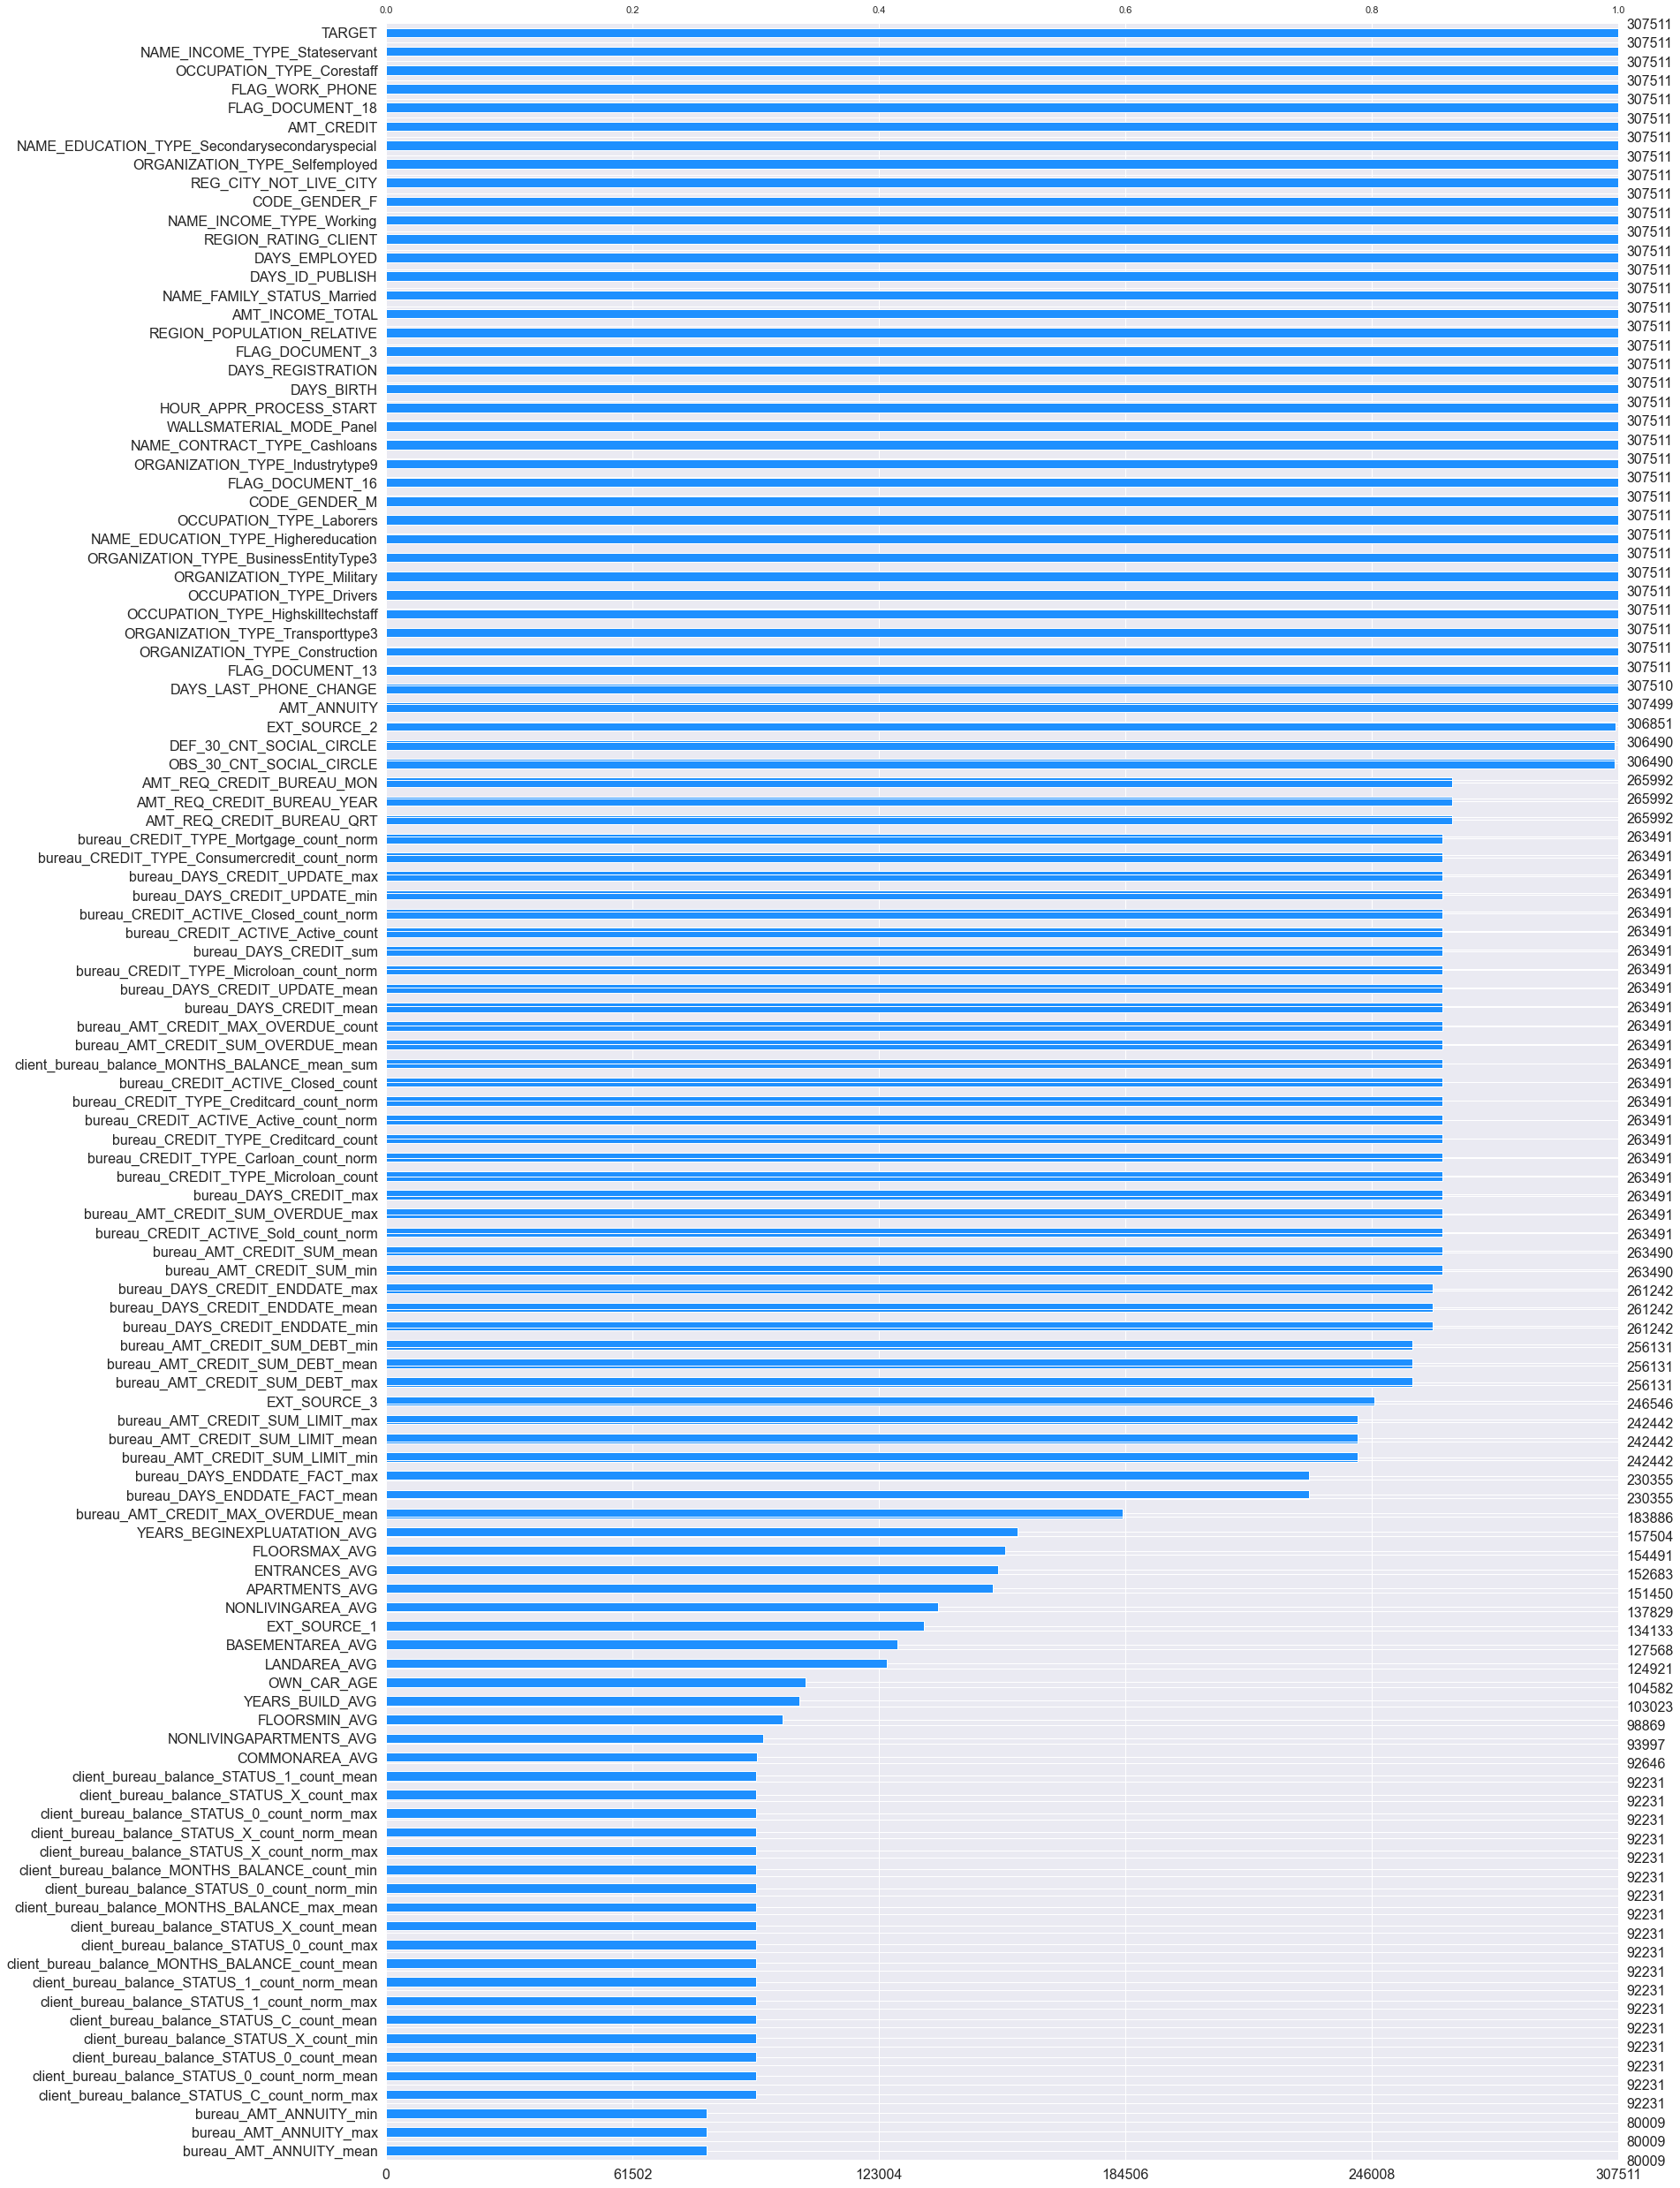

In [13]:
msgno.bar(train,color="dodgerblue", sort="ascending")


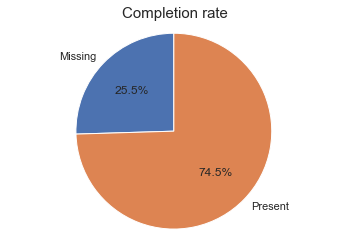

In [14]:
labels = 'Missing', 'Present'

fig, ax = plt.subplots()
sizes = train.isnull().sum().sum(), train.notnull().sum().sum()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # s'assurer que le graphe soit un cercle
ax.set_title('Completion rate',fontsize=15)

plt.show()

In [15]:
# Dropping the columns where filling rate < 90%
# ----------------------------------------------

def get_features_under_filling_threshold(features_df, threshold=0.9):
    # computing the filling rates
    col_fillings = columns_filling_rate(features_df, columns='all', missing_only=True)

    # creating a mask for filling rate < threshold
    mask = col_fillings['filling_rate'] < threshold

    # getting the list of features
    set_cols_to_delete = set(col_fillings[mask].index)
    return set_cols_to_delete


set_cols_to_delete_train = get_features_under_filling_threshold(train, threshold=0.9)
set_cols_to_delete_test = get_features_under_filling_threshold(train, threshold=0.9)
set_cols_to_delete = set_cols_to_delete_train.union(set_cols_to_delete_test)

# deleting the rows both in train set and test set
train = train.drop(columns=set_cols_to_delete)
test = test.drop(columns=set_cols_to_delete)

global_filling_rate(train)
print(train.shape)
print(test.shape)

DataFrame has 307511 rows and 40 columns.

Global filling rate of the DataFrame: 99.98%
Missing values in the DataFrame: 2715 (0.02%)

Number of rows with missing values: 1689 (0.55%)
Number of columns with missing values: 5 (12.50%)
(307511, 40)
(48744, 39)


In [16]:
columns_filling_rate(train, columns='all', missing_only=True)

,nb_values,missing_values,filling_rate
DEF_30_CNT_SOCIAL_CIRCLE,306490.0,1021.0,0.996680
OBS_30_CNT_SOCIAL_CIRCLE,306490.0,1021.0,0.996680
EXT_SOURCE_2,306851.0,660.0,0.997854
AMT_ANNUITY,307499.0,12.0,0.999961
DAYS_LAST_PHONE_CHANGE,307510.0,1.0,0.999997


In [17]:
def filtering_rows(df, threshold=0.9):

    import seaborn as sns

    # Compute the filling rates of each row
    filling_rate_rows = df.notna().mean(axis=1)

    # Display the histogram and KDE of the distribution
    ax = sns.distplot(filling_rate_rows, kde=False)

    # Create a mask for rows where filling rate is above threhold
    mask = filling_rate_rows > threshold

    # Filtering the DataFrame
    filtered_df = df[mask]

    # Display the results
    print('Threshold for filling rate:', threshold)
    print('Rows under threshold:', len(df) - len(filtered_df))
    print('Rows above threshold:', len(filtered_df))

    # Return the filtered DataFrame
    return filtered_df

Threshold for filling rate: 0.9
Rows under threshold: 0
Rows above threshold: 307511


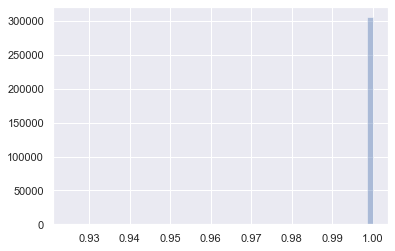

In [18]:
train = filtering_rows(train, threshold=0.9)

## Data types

df shape = (307511, 40)
NaN rate over whole df = 0%
df duplicates rate = 0%


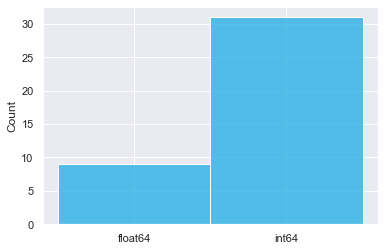

SK_ID_CURR,100002,100003,100004,100006,100007
EXT_SOURCE_2,0.262949,6.222458e-01,0.555912,0.650442,0.322738
DAYS_BIRTH,-9461.000000,-1.676500e+04,-19046.000000,-19005.000000,-19932.000000
AMT_CREDIT,406597.500000,1.293502e+06,135000.000000,312682.500000,513000.000000
AMT_ANNUITY,24700.500000,3.569850e+04,6750.000000,29686.500000,21865.500000
DAYS_EMPLOYED,-637.000000,-1.188000e+03,-225.000000,-3039.000000,-3038.000000
DAYS_ID_PUBLISH,-2120.000000,-2.910000e+02,-2531.000000,-2437.000000,-3458.000000
DAYS_LAST_PHONE_CHANGE,-1134.000000,-8.280000e+02,-815.000000,-617.000000,-1106.000000
DAYS_REGISTRATION,-3648.000000,-1.186000e+03,-4260.000000,-9833.000000,-4311.000000
REGION_POPULATION_RELATIVE,0.018801,3.541000e-03,0.010032,0.008019,0.028663
AMT_INCOME_TOTAL,202500.000000,2.700000e+05,67500.000000,135000.000000,121500.000000


In [19]:
from IPython.display import display, HTML
print(f'df shape = {train.shape}')
print(f'NaN rate over whole df = {train.isna().sum().sum()/train.size:.0%}')
print(f'df duplicates rate = {(len(train)-len(train.drop_duplicates()))/len(train):.0%}')

sns.histplot(train.dtypes.astype('string').sort_values(), color = '#1CADE4');
plt.show()

display(HTML(train.head(5).T.to_html()))

In [20]:
train.describe()

,EXT_SOURCE_2,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,CODE_GENDER_F,NAME_EDUCATION_TYPE_Highereducation,NAME_CONTRACT_TYPE_Cashloans,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,NAME_FAMILY_STATUS_Married,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,OBS_30_CNT_SOCIAL_CIRCLE,NAME_INCOME_TYPE_Working,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE_Selfemployed,NAME_EDUCATION_TYPE_Secondarysecondaryspecial,FLAG_DOCUMENT_18,FLAG_WORK_PHONE,OCCUPATION_TYPE_Corestaff,NAME_INCOME_TYPE_Stateservant,FLAG_DOCUMENT_13,ORGANIZATION_TYPE_Construction,OCCUPATION_TYPE_Drivers,ORGANIZATION_TYPE_Military,OCCUPATION_TYPE_Laborers,FLAG_DOCUMENT_16,ORGANIZATION_TYPE_Industrytype9,ORGANIZATION_TYPE_BusinessEntityType3,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Transporttype3,CODE_GENDER_M,OCCUPATION_TYPE_Highskilltechstaff,TARGET
count,3.068510e+05,307511.000000,3.075110e+05,307499.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,307511.000000,306490.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,5.143927e-01,-16036.995067,5.990260e+05,27108.573909,63815.045904,-2994.202373,-962.858788,-4986.120328,0.020868,1.687979e+05,0.658344,0.243448,0.904787,12.063419,2.052463,0.638780,0.143421,0.710023,1.422245,0.516320,0.078173,0.124913,0.710189,0.008130,0.199368,0.089655,0.070576,0.003525,0.021856,0.060495,0.008566,0.179460,0.009928,0.010952,0.221104,0.214757,0.003860,0.341643,0.037007,0.080729
std,1.910602e-01,4363.988632,4.024908e+05,14493.737315,141275.766519,1509.450419,826.808487,3522.886321,0.013831,2.371231e+05,0.474266,0.429164,0.293509,3.265832,0.509034,0.480355,0.446698,0.453752,2.400989,0.499734,0.268444,0.330620,0.453675,0.089798,0.399526,0.285688,0.256116,0.059268,0.146214,0.238403,0.092153,0.383738,0.099144,0.104079,0.414991,0.410654,0.062009,0.474261,0.188779,0.272419
min,8.173617e-08,-25229.000000,4.500000e+04,1615.500000,-17912.000000,-7197.000000,-4292.000000,-24672.000000,0.000290,2.565000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.924574e-01,-19682.000000,2.700000e+05,16524.000000,-2760.000000,-4299.000000,-1570.000000,-7479.500000,0.010006,1.125000e+05,0.000000,0.000000,1.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.659614e-01,-15750.000000,5.135310e+05,24903.000000,-1213.000000,-3254.000000,-757.000000,-4504.000000,0.018850,1.471500e+05,1.000000,0.000000,1.000000,12.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.636171e-01,-12413.000000,8.086500e+05,34596.000000,-289.000000,-1720.000000,-274.000000,-2010.000000,0.028663,2.025000e+05,1.000000,0.000000,1.000000,14.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,8.549997e-01,-7489.000000,4.050000e+06,258025.500000,365243.000000,0.000000,0.000000,0.000000,0.072508,1.170000

In [21]:
train.dtypes

EXT_SOURCE_2                                     float64
DAYS_BIRTH                                         int64
AMT_CREDIT                                       float64
AMT_ANNUITY                                      float64
DAYS_EMPLOYED                                      int64
DAYS_ID_PUBLISH                                    int64
DAYS_LAST_PHONE_CHANGE                           float64
DAYS_REGISTRATION                                float64
REGION_POPULATION_RELATIVE                       float64
AMT_INCOME_TOTAL                                 float64
CODE_GENDER_F                                      int64
NAME_EDUCATION_TYPE_Highereducation                int64
NAME_CONTRACT_TYPE_Cashloans                       int64
HOUR_APPR_PROCESS_START                            int64
REGION_RATING_CLIENT                               int64
NAME_FAMILY_STATUS_Married                         int64
DEF_30_CNT_SOCIAL_CIRCLE                         float64
FLAG_DOCUMENT_3                

## Class balance

In [22]:
def categorical_distribution(dataframe, feature, ordinal=False):
    """Function plotting the bar-plot and pie-plot (as subplots) for 
    a distribution of categorical features."""
    
    # importing libraries
    import matplotlib.pyplot as plt

    # filtering non-null data for the feature
    mask = dataframe[feature].notnull()
    data_view = dataframe[mask]
    
    # Setting the data to plot
    x=data_view[feature]
    
    # Set frequencies and labels, sorting by index
    if ordinal==True:
        labels = list(x.value_counts().sort_index().index.astype(str))
        frequencies = x.value_counts().sort_index()
    else:
        labels = list(x.value_counts().sort_values(ascending=False).index.astype(str))
        frequencies = x.value_counts().sort_values(ascending=False)
    
    # Graphical properties of the main figure
    fig = plt.figure(figsize=(14, 6))
    
    plt.suptitle("Empiric statistical distribution: " + feature, fontsize=25)
    
    # Main graphical properties of the first subplot (histogram)
    ax1 = plt.subplot(121)
    ax1.set_xlabel("Values", fontsize=20)
    ax1.set_ylabel("Frequencies", fontsize=20)
    ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")

    # Main graphical properties of the second subplot (pieplot)
    ax2 = plt.subplot(122)
    ax2.set_xlabel("Relative frequencies", fontsize=20)
    
    # plotting the plots
    ax1.bar(labels, frequencies)
    ax2.pie(frequencies,
            autopct='%1.2f%%',
            shadow=True,
              )
    
    ax2.legend(labels)
    plt.show()
    return fig

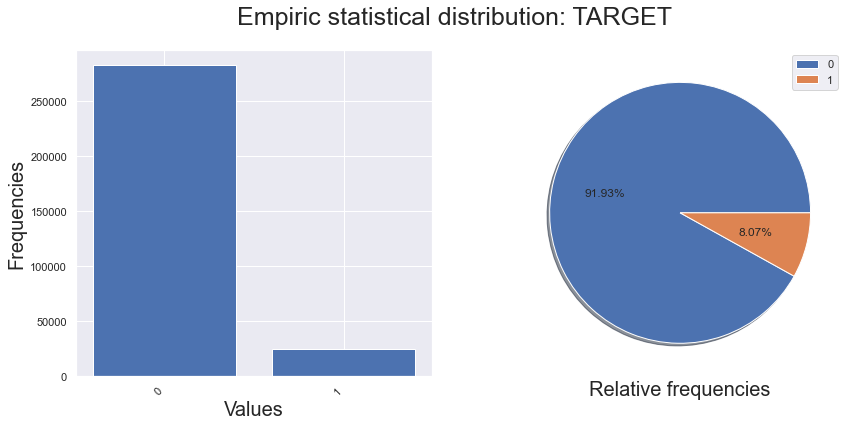

In [23]:
fig = categorical_distribution(
    train,
    'TARGET'
)

fig.savefig('plots/imba_classes.png')

## Cleaned data

In [24]:
train.to_csv('data_p7/cleaned/data_train_featured.csv')

# **Preparation**

In [25]:
import pandas as pd

train = pd.read_csv('data_p7/cleaned/data_train_featured.csv', index_col='SK_ID_CURR')

In [26]:
# Set random integer (seed) - 891
from random import randrange
seed = randrange(1000)
print("Seed value: ", seed)

Seed value:  360


## Separation 

In [27]:
from sklearn.model_selection import train_test_split

# Splitting features and targets
X = train.drop(columns='TARGET')
y = train['TARGET']

# Splitting into fitting set and evaluation set
(X_fit, X_eval, y_fit, y_eval) = train_test_split(
        X,
        y,
        train_size=0.8,
        test_size=0.2,
        random_state=seed,
        stratify=y, # because classes are imbalanced
    )

In [28]:
len(X)

307511

In [29]:
len(y)

307511

In [30]:
len(X_fit)

246008

In [31]:
len(X_eval)

61503

In [32]:
len(y_fit)

246008

In [33]:
len(y_eval)

61503

## **Imputations**

In [34]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(X_fit)

feature_names = X_fit.columns
index_X_fit = X_fit.index
index_X_eval = X_eval.index

X_fit = pd.DataFrame(imp_mean.transform(X_fit), columns=feature_names, index=index_X_fit)
X_eval = pd.DataFrame(imp_mean.transform(X_eval), columns=feature_names, index=index_X_eval)

## Balancing

### Oversampling

Counter({0: 4950, 1: 50})
Counter({0: 4950, 1: 4950})


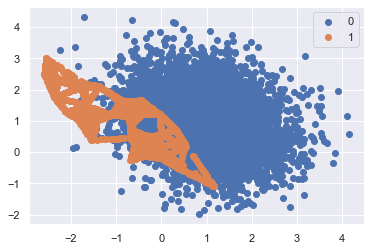

In [35]:

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X_fit_sample, y_fit_sample = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_fit_sample)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_fit_sample == label)[0]
    pyplot.scatter(X_fit_sample[row_ix, 0], X_fit_sample[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [36]:
len(X_fit_sample)

9900

In [37]:
len(y_fit_sample)

9900

# Selection of pipleline

In [38]:
#pip install git+https://github.com/hyperopt/hyperopt.git

In [39]:
#pip install hyperopt

In [40]:
from hyperopt import hp

# Initializing the search space
space = {}

## Space definition

In [41]:
# Initializing the search space for preprocessing steps
space['preprocessing_steps'] = {
    'scale':       hp.choice('scale', [True, False]),
    'normalize':       hp.choice('normalize', [True, False]),
}

In [42]:
# Define the preprocessing steps
# StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution. It is more useful in classification than regression. 
# Normalizer : It squeezes the data between 0 and 1. It performs normalization. Due to the decreased range and magnitude, the gradients in the training process do not explode and you do not get higher values of loss. Is more useful in regression than classification. 

def preprocess_steps(params, X_):
    from sklearn.preprocessing import Normalizer
    from sklearn.preprocessing import StandardScaler
    
    # Display some information…
    print('Preprocessing in progress…')
    
    if 'normalize' in params['preprocessing_steps']:
        if params['preprocessing_steps']['normalize'] == True:
            X_ = Normalizer().fit_transform(X_)
        
    if 'scale' in params['preprocessing_steps']:
        if params['preprocessing_steps']['scale'] == True:
            X_ = StandardScaler().fit_transform(X_)

    return X_

In [43]:
# Loading libraries
from hyperopt import hp

# Initalisation of the spaces of research for models
models_spaces = {}

In [44]:
from sklearn.naive_bayes import GaussianNB

### NAIVE BAYES
models_spaces['naive_bayes'] = {
    'model': GaussianNB,
}

In [45]:
from sklearn.ensemble._forest import RandomForestClassifier

### RANDOM FOREST
models_spaces['rf'] = { 
    'model':        RandomForestClassifier,
    'max_depth':    hp.choice('rf_max_depth', range(1,20)),
    'max_features': hp.choice('rf_max_features', range(1,20)),
    'n_estimators': hp.choice('rf_n_estimators', range(10,40)),
    'criterion':    hp.choice('rf_criterion', ["gini", "entropy"]),
}

In [46]:
from sklearn.linear_model import LogisticRegression

### LOGISTIC REGRESSION
models_spaces['logit'] = { 
    'model':          LogisticRegression,
    'warm_start' :    hp.choice('logit_warm_start', [True, False]),
    'fit_intercept' : hp.choice('logit_fit_intercept', [True, False]),
    'tol' :           hp.uniform('logit_tol', 0.00001, 0.0001),
    'C' :             hp.uniform('logit_C', 0.05, 3),
    'solver' :        hp.choice('logit_solver', ['newton-cg', 'lbfgs', 'liblinear']),
    'max_iter' :      hp.choice('logit_max_iter', range(100,1000)),
    'multi_class' :   'auto',
    'class_weight' :  'balanced',
}

In [47]:
from sklearn.tree import DecisionTreeClassifier

### DECISION TREE
models_spaces['dt'] = {
    'model': DecisionTreeClassifier,
    'max_depth': hp.choice('dt_max_depth', range(1,20)),
    'max_features': hp.choice('dt_max_features', range(1,20)),
    'criterion': hp.choice('dt_criterion', ["gini", "entropy"])
}



In [48]:
models_spaces

{'naive_bayes': {'model': sklearn.naive_bayes.GaussianNB},
 'rf': {'model': sklearn.ensemble._forest.RandomForestClassifier,
  'max_depth': <hyperopt.pyll.base.Apply at 0x1621c435a00>,
  'max_features': <hyperopt.pyll.base.Apply at 0x1621c435df0>,
  'n_estimators': <hyperopt.pyll.base.Apply at 0x1621c4372b0>,
  'criterion': <hyperopt.pyll.base.Apply at 0x1621c437940>},
 'logit': {'model': sklearn.linear_model._logistic.LogisticRegression,
  'warm_start': <hyperopt.pyll.base.Apply at 0x1621c437dc0>,
  'fit_intercept': <hyperopt.pyll.base.Apply at 0x1621c437ee0>,
  'tol': <hyperopt.pyll.base.Apply at 0x1621c4400a0>,
  'C': <hyperopt.pyll.base.Apply at 0x1621c4401c0>,
  'solver': <hyperopt.pyll.base.Apply at 0x1621c4402b0>,
  'max_iter': <hyperopt.pyll.base.Apply at 0x1621c440400>,
  'multi_class': 'auto',
  'class_weight': 'balanced'},
 'dt': {'model': sklearn.tree._classes.DecisionTreeClassifier,
  'max_depth': <hyperopt.pyll.base.Apply at 0x162095b4e80>,
  'max_features': <hyperopt.pyl

In [49]:
# Creating the whole space from all the model-specific spaces
space['models_spaces'] = hp.choice(
        'models_spaces',
        [ models_spaces[key] for key in models_spaces ]
    )

## Selection


### Metric

* $gain = TP·TP\_value + TN·TN\_value + FP·FP\_value + FN·FN\_value$
* $max\_gain = N·TN\_value + P·TP\_value$
* $baseline = (TN+FP)·TN\_value + (TP+FN)·FN\_value$

=> $score = \frac{gain - baseline}{max\_gain - baseline} ∈ [0 ; 1]$

=> $model\_score = \underset{threshold \in [0;1]}{\text{max}} [score] ∈ [0 ; 1]$

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_score(y_true, y_pred):
    # Relative loss and gains for each case
    TP_value = 0       # expected default
    FP_value = 0       # unexpected not-default (real: not-default, predicted: default)
    FN_value = -10     # unexpected default (real: default(P), predicted: not-default(N))
    TN_value = 1       # expected not-default

    # Confusion matrix
    (TN, FP, FN, TP) = confusion_matrix(y_true, y_pred).ravel()

    # Full negative and positive cases
    N = TN + FP # total true not-default
    P = TP + FN # total true default
    
    gain = TP*TP_value + TN*TN_value + FP*FP_value + FN*FN_value
    # perfect model, 0 error
    best = N*TN_value + P*TP_value
    # worst = P*FN_value + N*FP_value
    # baseline : strategy : “most_frequent” (N) 
    baseline = N*TN_value + P*FN_value
    
    # normalize to get score between 0 (baseline) and 1
    score = (gain - baseline) / (best - baseline)
    return score


def predict_threshold(model, X, threshold=0.5):
    predictions = model.predict_proba(X)
    mask = (predictions[:, 1] > threshold)
    return mask.astype(int)


def custom_scorer(model, X, y_true):
    scores = []
    for threshold in np.linspace(0, 1, num=101):
    #threshold = 0.5
        y_pred = predict_threshold(model, X, threshold=threshold)
        score = custom_score(y_true, y_pred)
        scores.append(score)
    # print(max(scores))
    return max(scores)
    # return score

### Cross validation

In [51]:
from sklearn.model_selection import KFold

# Define the cross-validation generator
cv_inner = KFold(
    n_splits=3, # number of folds (default=5)
    shuffle=True, # shuffle the data before splitting into batche
    random_state=seed, # seeding the random number generator for shuffling
)

In [52]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Define the loss metric for the model
def get_acc_status(clf, X_, y):
    
    # Display some information…
    print('Cross-validation in progress…')
    
    # Proceed to the cross-validation
    # cv_result is a dict : test_score, train_score, fit_time, score_time, estimator
    cv_results = cross_validate(
        clf,
        X_,
        y,
        cv=cv_inner,
        scoring=custom_scorer,
    )
    
    loss = -cv_results['test_score'].mean()
    
    # displays results
    print("Loss of the model:", loss)
    
    return {
        'loss': loss,
        'loss_std': cv_results['test_score'].std(),
        'status': STATUS_OK,
    }

## Objective

In [53]:
# Define th objective function
def obj_fnc(params):
        # Display the set of parameters currently evaluated
        print('Parameters tested:', params)
        
        # proceed to preprocessing
        X_fit_ = preprocess_steps(params, X_fit[:])
        
        # get all parameters, except the model
        parameters = params['models_spaces'].copy()
        del parameters['model']
        
        # instanciation of the classifier model with parameters
        clf = params['models_spaces']['model'](**parameters)
        
        # return loss and status
        return(get_acc_status(clf, X_fit_, y_fit))

## Research

In [54]:
# load libraries
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, space_eval
import pickle

def run_trials():

    trials_step = 1  # how many additional trials to do after loading saved trials. 1 = save after iteration
    initial_evals = 1  # initial max_trials. put something small to not have to wait

    try:  # try to load an already saved trials object, and increase the max
        hypopt_trials = pickle.load(open("hp_trials/trials.hyperopt", "rb"))
        print("Found saved Trials! Loading...")
        max_evals = len(hypopt_trials.trials) + trials_step
        print("Rerunning from {} trials.".format(len(hypopt_trials.trials)))
        
    except:  # create a new trials object and start searching
        print("Unable to load previous trials...")
        hypopt_trials = Trials()
        max_evals = initial_evals

    # Optimisation accross the search space
    global best_params
    best_params = fmin(
        obj_fnc,
        space=space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=hypopt_trials
    )

    # save the trials object
    with open("hp_trials/trials.hyperopt", mode="wb") as f:
        pickle.dump(hypopt_trials, f)
        
    # get the best_params and save them
    best_params = space_eval(space, best_params)
    with open("hp_trials/best_params.hyperopt", mode="wb") as f:
        pickle.dump(best_params, f)
    
    # print the main results
    print(
        #"\nAlgo:", best_params['models_spaces']['model'],
        "\nBest loss:", hypopt_trials.best_trial['result']['loss'],
        #"\nPreprocessing:", best_params['preprocessing_steps'],
        #"\nModel params:", best_params['models_spaces'],
        "\n----------------------",
    )

## Research execution

In [61]:
#!pip install keyboard

import threading as th
import keyboard

# loop indefinitely and stop whenever you like (pressing ENTER)
keep_going = True
def key_capture_thread():
    global keep_going
    # Blocks until you press 'ESC'.
    keyboard.wait('esc')
    keep_going = False
    print('\nINTERRUPTING… Please wait until shut down.')

def trials_loop():
    th.Thread(target=key_capture_thread, args=(), name='key_capture_thread', daemon=True).start()
    while keep_going:
        print("\nRUNNING... Press 'ESC' key to interrupt.")
        run_trials()

    print('\nINTERRUPTED!')

trials_loop()


RUNNING... Press 'ESC' key to interrupt.
Found saved Trials! Loading...
Rerunning from 321 trials.
Parameters tested:                                       
{'models_spaces': {'criterion': 'entropy', 'max_depth': 13, 'max_features': 5, 'model': <class 'sklearn.ensemble._forest.RandomForestClassifier'>, 'n_estimators': 22}, 'preprocessing_steps': {'normalize': False, 'scale': False}}
Preprocessing in progress…                               
Cross-validation in progress…                            
Loss of the model:                                       
-0.2321231646240017                                      
100%|██████████| 322/322 [01:38<00:00, 98.29s/trial, best loss: -0.2515859781088568]

Best loss: -0.2515859781088568 
----------------------

RUNNING... Press 'ESC' key to interrupt.
Found saved Trials! Loading...
Rerunning from 322 trials.
Parameters tested:                                       
{'models_spaces': {'criterion': 'entropy', 'max_depth': 1, 'max_features': 8, 'mod

# Optimised pipleline

## Best hyperparameters

In [55]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure. 
import pickle

# Load the best_params
best_params = pickle.load(open("hp_trials/best_params.hyperopt", "rb"))

# print current best_params
best_params

{'models_spaces': {'criterion': 'entropy',
  'max_depth': 9,
  'max_features': 14,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'n_estimators': 29},
 'preprocessing_steps': {'normalize': False, 'scale': True}}

In [56]:
def define_preprocess_pipeline():

    # Load libraries
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import Normalizer
    from sklearn.preprocessing import StandardScaler
    
    # Initializing the list of preprocessing steps
    preprocessing_steps = []
    
    if 'normalize' in best_params['preprocessing_steps']:
        if best_params['preprocessing_steps']['normalize'] == True:
            # add the normalisation step to the preprocessing steps
            preprocessing_steps.append(('normalize', Normalizer()))
    
    if 'scale' in best_params['preprocessing_steps']:
        if best_params['preprocessing_steps']['scale'] == True:
            # add the scaling step to the preprocessing steps
            preprocessing_steps.append(('scale', StandardScaler()))
    
    # Creating the preprocessing pipeline
    if len(preprocessing_steps) != 0:
        # if some processing
        preprocessor = Pipeline(
            steps=preprocessing_steps
        )
    else:
        # if no processing step
        preprocessor = Pipeline(
            steps=[('passthrough', None)]
        )
        return None

    return preprocessor

preprocessor = define_preprocess_pipeline()

In [57]:
def define_model(params):
    # Get the model from parameters
    model = params['models_spaces'].pop('model')
    
    # Instanciate model with best parameters 
    model_instance = model(**params['models_spaces'])
    
    # Return instanciated model
    return model_instance


def define_pipeline(preprocessor, model):

    # Load libraries
    from sklearn.pipeline import Pipeline
    
    # Create a pipeline
    if preprocessor is not None:
        pipe = Pipeline([
            ("preprocess", preprocessor), # preprocessing steps
            ("model", model), # modelisation
            ])
    else:
        pipe = classifier
    
    # Return pipeline
    return pipe

In [58]:
model_instance = define_model(best_params)

pipe = define_pipeline(preprocessor, model_instance)
pipe.fit(X_fit, y_fit)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scale', StandardScaler())])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        max_features=14, n_estimators=29))])

# Evaluation

## Baseline


In [70]:
from sklearn.dummy import DummyClassifier

# Creating a naïve baseline model predicting non-defaut
baseline = DummyClassifier(strategy='constant', constant=0)
baseline.fit(X_fit, y_fit)

DummyClassifier(constant=0, strategy='constant')

### Confusion matrix

#### Test dataset

In [71]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn import metrics
y_prob = pipe.predict_proba(X_eval)
y_prob = y_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)

# calculate the g-mean for each threshold
g_means = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(g_means)

y_prob = (y_prob >= thresholds[ix]).astype(bool)

tn, fp, fn, tp = confusion_matrix(y_eval, y_prob).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')
conf_mat = [[tp,fn],[fp,tn]]

auc = metrics.roc_auc_score(y_eval, y_prob)
recall = metrics.recall_score(y_eval, y_prob)
precision = metrics.precision_score(y_eval, y_prob)
f1 = metrics.f1_score(y_eval, y_prob)

TN = 36679, FP = 19859, FN = 1763, TP = 3202


In [61]:
import os
import gc
import csv
import zipfile
from urllib.request import urlretrieve
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

%matplotlib inline

rc = {"font.family": "Arial",
      "font.size": 16,        
      "axes.labelsize": 16,
      "axes.titlesize": 16,
      "legend.fontsize": 14, 
      "xtick.labelsize": 14, 
      "ytick.labelsize": 14}


def my_colors(n=5):
    return [(sns.color_palette("viridis", 100)[i]) for i in np.linspace(0, 99, n, dtype=int)]
def my_colors_r(n=5):
    return [(sns.color_palette("viridis_r", 100)[i]) for i in np.linspace(0, 99, n, dtype=int)]

sns.set(font="Arial", rc=rc, palette=my_colors())
sns.set_style("ticks", {"axes.edgecolor": "k", 
                        "axes.linewidth": 0.8, 
                        "axes.grid": False,
                        "xtick.major.width": 0.8, 
                        "ytick.major.width": 0.8})

TN = 36679, FP = 19859, FN = 1763, TP = 3202
Testset: threshold = 8%, G-Mean= 65%, AUC = 65%, recall= 64%, f1 = 23%


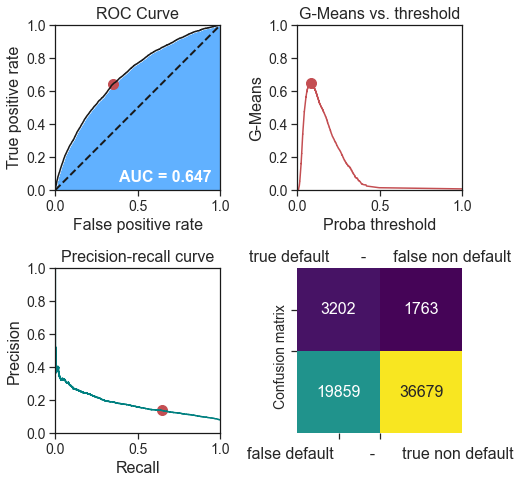

In [72]:
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')

######################################
print(f'Testset: \
threshold = {thresholds[ix]:.0%}, \
G-Mean= {g_means[ix]:.0%}, \
AUC = {auc:.0%}, \
recall= {recall:.0%}, \
f1 = {f1:.0%}')
######################################

plt.figure(figsize=(7, 7))

plt.subplot(221)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1], '--', lw=2, color='k')
plt.fill_between(fpr, tpr, facecolor='dodgerblue', alpha=0.7)
plt.scatter(fpr[ix], tpr[ix], marker='o', s=100, color='r', label='Best')
plt.text(0.95, 0.05, f'AUC = {auc:.3f}', ha='right',
         fontsize=16, weight='bold', color='white')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.subplot(222)
plt.plot(thresholds, g_means, 'r');
plt.scatter(thresholds[ix], g_means[ix], marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Proba threshold')
plt.ylim(0,1)
plt.ylabel('G-Means')
plt.title('G-Means vs. threshold')

plt.subplot(223)
plt.plot(recall_, precision_, 'teal');
plt.scatter(recall, precision, marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Recall')
plt.ylim(0,1)
plt.ylabel('Precision')
plt.title('Precision-recall curve')

plt.subplot(224)
sns.heatmap(conf_mat, cmap=my_colors(100), annot=True, fmt='.0f', cbar=False)
plt.xticks([0.5,1], ["",""])
plt.yticks([0.5,1], ["Confusion matrix",""])
plt.xlabel('false default        -      true non default')

plt.title('true default       -      false non default')

plt.tight_layout(pad=1.1)
plt.show()

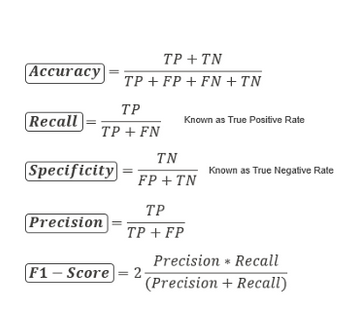

#### Custom metric

In [73]:
# Scoring the the naïve baseline model
score = custom_scorer(baseline, X_eval, y_eval)
print("Score of the naïve model: Custom_metric = {:.4f}".format(score))

# Scoring the the selected model on training set
score_fit = custom_scorer(pipe, X_fit, y_fit)
print("Score of the selected model (on X_fit): Custom_metric = {:.4f}".format(score_fit))

# Scoring the the selected model on training set
score_eval = custom_scorer(pipe, X_eval, y_eval)
print("Score of the selected model (on X_eval): Custom_metric = {:.4f}".format(score_eval))

Score of the naïve model: Custom_metric = 0.0000
Score of the selected model (on X_fit): Custom_metric = 0.3326
Score of the selected model (on X_eval): Custom_metric = 0.2417


#### Compare with lgbm

In [74]:
df_pay = train[train.TARGET == 0]
df_unpay = train[train.TARGET == 1]

In [75]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n = 10
weight = len(df_pay)/len(df_unpay)

lgbm = LGBMClassifier(max_depth=-1,
                      random_state=13,
                      silent=True,
                      metric='None',
                      n_jobs=-1,
                      n_estimators=200,
                      scale_pos_weight=weight,
                      )

lgbm_param = {'num_leaves': np.linspace(10, 80, 7, dtype='int'),
              'min_child_samples': stats.randint(100, 500),
              'min_child_weight': [1e-5, 1e-2, 1, 1e2, 1e4],
              'subsample': stats.uniform(loc=0.2, scale=0.8),
              'colsample_bytree': stats.uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0.1, 1,  10, 100],
              'reg_lambda': [0.1, 1, 10,  50, 100]}

grid = RandomizedSearchCV(lgbm,
                          lgbm_param,
                          n_iter=n,
                          cv=3,
                          scoring='roc_auc',
                          n_jobs=-1,
                          verbose=True,
                          random_state=13)

model = grid.fit(X_fit, y_fit)

print(round(grid.best_score_, 3))
print(grid.best_params_)
optima = pd.DataFrame(grid.cv_results_).T
optima

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.714
{'colsample_bytree': 0.5790696825335077, 'min_child_samples': 260, 'min_child_weight': 100.0, 'num_leaves': 68, 'reg_alpha': 100, 'reg_lambda': 50, 'subsample': 0.5976042668810364}


,0,1,2,3,4,5,6,7,8,9
mean_fit_time,15.058815,14.881956,16.314481,15.347377,14.494658,12.285662,10.084253,7.715569,7.226534,7.169689
std_fit_time,0.059746,0.038025,0.141248,0.094456,0.176676,2.66907,0.068086,0.040217,0.044274,0.16746
mean_score_time,2.712784,2.766971,2.649438,2.561855,2.554866,2.243064,2.277013,1.145948,1.048204,1.580128
std_score_time,0.038959,0.028818,0.006667,0.029857,0.019542,0.236238,0.031998,0.078745,0.012938,0.044484
param_colsample_bytree,0.866621,0.85515,0.57907,0.66776,0.969457,0.813867,0.757122,0.471014,0.580131,0.863427
param_min_child_samples,174,344,260,246,280,124,343,465,397,241
param_min_child_weight,0.00001,1,100.0,0.00001,100.0,0.01,100.0,10000.0,10000.0,100.0
param_num_leaves,80,80,68,56,68,68,80,80,45,21
param_reg_alpha,10,10,100,100,0.1,100,10,100,10,1
param_reg_lambda,100,10,50,0.1,50,10,50,0.1,1,1


In [76]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn import metrics
y_prob = model.predict_proba(X_eval)
y_prob = y_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)

# calculate the g-mean for each threshold
g_means = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(g_means)

y_prob = (y_prob >= thresholds[ix]).astype(bool)

tn, fp, fn, tp = confusion_matrix(y_eval, y_prob).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')
conf_mat = [[tp,fn],[fp,tn]]

auc = metrics.roc_auc_score(y_eval, y_prob)
recall = metrics.recall_score(y_eval, y_prob)
precision = metrics.precision_score(y_eval, y_prob)
f1 = metrics.f1_score(y_eval, y_prob)

TN = 37094, FP = 19444, FN = 1679, TP = 3286


TN = 37094, FP = 19444, FN = 1679, TP = 3286
Testset: threshold = 47%, G-Mean= 66%, AUC = 66%, recall= 66%, f1 = 24%


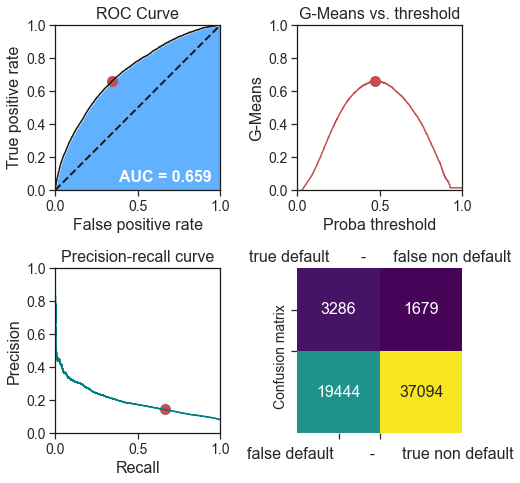

In [69]:
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')

######################################
print(f'Testset: \
threshold = {thresholds[ix]:.0%}, \
G-Mean= {g_means[ix]:.0%}, \
AUC = {auc:.0%}, \
recall= {recall:.0%}, \
f1 = {f1:.0%}')
######################################

plt.figure(figsize=(7, 7))

plt.subplot(221)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1], '--', lw=2, color='k')
plt.fill_between(fpr, tpr, facecolor='dodgerblue', alpha=0.7)
plt.scatter(fpr[ix], tpr[ix], marker='o', s=100, color='r', label='Best')
plt.text(0.95, 0.05, f'AUC = {auc:.3f}', ha='right',
         fontsize=16, weight='bold', color='white')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.subplot(222)
plt.plot(thresholds, g_means, 'r');
plt.scatter(thresholds[ix], g_means[ix], marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Proba threshold')
plt.ylim(0,1)
plt.ylabel('G-Means')
plt.title('G-Means vs. threshold')

plt.subplot(223)
plt.plot(recall_, precision_, 'teal');
plt.scatter(recall, precision, marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Recall')
plt.ylim(0,1)
plt.ylabel('Precision')
plt.title('Precision-recall curve')

plt.subplot(224)
sns.heatmap(conf_mat, cmap=my_colors(100), annot=True, fmt='.0f', cbar=False)
plt.xticks([0.5,1], ["",""])
plt.yticks([0.5,1], ["Confusion matrix",""])
plt.xlabel('false default        -      true non default')

plt.title('true default       -      false non default')

plt.tight_layout(pad=1.1)
plt.show()

Not big difference between lgbm and randomforest's best result. 

## Final retraining

In [77]:
# Load libraries
import sklearn
import joblib
from sklearn.impute import SimpleImputer

# Split features and targets
X = train.drop(columns='TARGET')
y = train['TARGET']

# Imputations
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(X)
X = pd.DataFrame(imp_mean.transform(X), columns=feature_names)

# Re-training the final model on the whole set
pipe.fit(X, y)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scale', StandardScaler())])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        max_features=14, n_estimators=29))])

In [80]:
model.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='None', n_estimators=200,
                                            random_state=13,
                                            scale_pos_weight=11.387150050352467,
                                            silent=True),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016220BE3700>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001621C661970>,
                                        'min_child_weight': [1e-05, 0.01, 1,
                                                             100.0, 10000.0],
                                        'num_leaves': array([10, 21, 33, 45, 56, 68, 80]),
                                        'reg_alpha': [0.1, 1, 10, 100],
                                        'reg_lambda': [0.1, 1, 10, 50, 100],


## Saving model

In [83]:
# Get scikit-learn version
scikit_version = sklearn.__version__

# Save the models as pickle files
joblib.dump(pipe, "models/model_{version}.pkl".format(version=scikit_version))

['models/model_0.24.2.pkl']

In [84]:
# Get scikit-learn version
scikit_version = sklearn.__version__

# Save the models as pickle files
joblib.dump(model, "models/model_lgbm.pkl".format(version=scikit_version))

['models/model_lgbm.pkl']